# M3P06-NLP_Project-HJS
---

Content:

1. **Load CSV**
2. **Explore Data**
3. **Encode Texts using Sentence Transformers**
4. **Reduction with PCA**
5. **Cluster with DBSCAN**
6. **Visualization**
7. **Save Cluster into CSV**

In [2]:
!pip install sentence_transformers

  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
Using cached sentence_transformers-4.1.0-py3-none-any.whl (345 kB)
Using cached huggingface_hub-0.30.2-py3-none-any.whl (481 kB)
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 1.6/212.5 MB 8.4 MB/s eta 0:00:26
    --------------------------------------- 4.7/212.5 MB 11.9 MB/s eta 0:00:18
   - -------------------------------------- 6.8/212.5 MB 11.0 MB/s eta 0:00:19
   - -------------------------------------- 7.1/212.5 MB 11.2 MB/s eta 0:00:19
   - -------------------------------------- 7.1/212.5 M

In [4]:
pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 11.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

C:\Users\szmaj\.conda\envs\tf_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Load CSV
I got the information from Wikipedia with and endpoint where I got random publications.
- File used for webScrapping - "wikipedia_webscrapping.py"
- Wikipedia Endpoint used: "http://en.wikipedia.org/wiki/Special:Random"
- CSV File generated "wikipedia_random_intro.csv"

In [2]:
df = pd.read_csv('wikipedia_random_intro2.csv', delimiter=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Introduction  1162 non-null   object
dtypes: object(1)
memory usage: 9.2+ KB


In [4]:
df.count().isnull()

Introduction    False
dtype: bool

## 2. Explore Data

In [5]:
df.head()

,Introduction
0,TheJapan women's national under-18 and under-1...
1,The1953 Coronation Honourswere appointments by...
2,Bangagouis a town in theBoussouma Departmentof...
3,Brevoxathresis a genus ofbeetlesin the familyC...
4,"Kastrophylax(Greek:καστροφύλαξ, fortress guard..."


## 3. Encode Texts using Sentence Transformers

In [6]:
# 3. Encode Texts using Sentence Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['Introduction'].tolist(), show_progress_bar=True)

Batches: 100%|██████████| 37/37 [00:31<00:00,  1.16it/s]


In [7]:
embeddings.shape

(1162, 384)

In [8]:
X_reduced = embeddings

## 4. Reduction with PCA

In [9]:
# 5. Reduction with PCA
#pca = PCA(n_components=7, random_state=42)
#X_reduced = pca.fit_transform(embeddings)

In [10]:
X_reduced.shape

(1162, 384)

## 5. Cluster with DBSCAN

In [11]:
dbscan = DBSCAN(eps=1, min_samples=5, metric='euclidean')
cluster_labels = dbscan.fit_predict(X_reduced)

In [12]:
cluster_labels

array([ 9, -1, -1, ..., -1, -1, -1])

In [13]:
df['Cluster'] = cluster_labels

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Introduction  1162 non-null   object
 1   Cluster       1162 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.3+ KB


## 6. Visualization

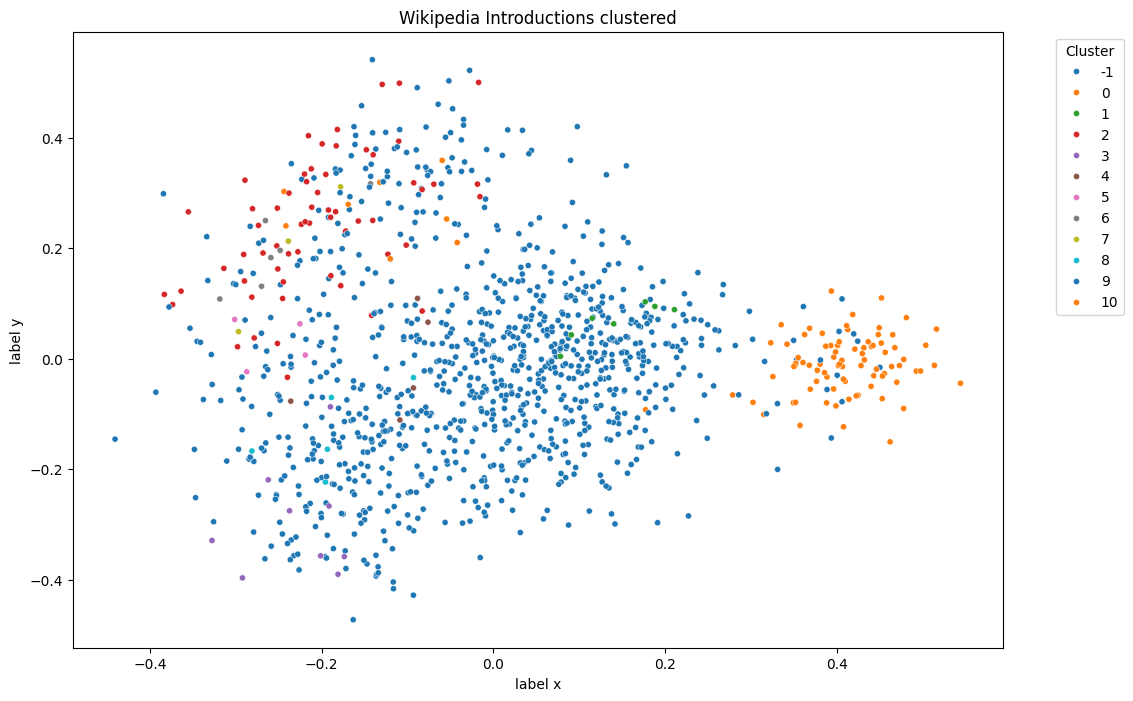

In [18]:
# 5. Visualization
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_reduced)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=cluster_labels, palette='tab10', s=20, legend='full')
plt.title('Wikipedia Introductions clustered')
plt.xlabel('label x')
plt.ylabel('label y')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
for cluster_id in range(0, 11):  
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data['Introduction'])  
    print(f"Number of examples in Cluster {cluster_id}: {len(cluster_data)}\n")

Cluster 0:
3       Brevoxathresis a genus ofbeetlesin the familyC...
13      Scaevola virgatais a species of flowering plan...
22      Sogatellais a genus of delphacid planthoppers ...
23      Haeterius ferrugineusis abeetlebelonging to th...
26      TheFamennianis the later of twofaunal stagesin...
                              ...                        
1090    Scyphosyceis a genus offlowering plantsbelongi...
1094    Nomingiais agenusofoviraptorosaurtheropoddinos...
1136    Leptocroca aquilonarisis amothof the familyOec...
1153    Acacia inamabilisis a shrub belonging to the g...
1156    TheYoknapatawpha darter(Etheostoma faulkneri) ...
Name: Introduction, Length: 83, dtype: object
Number of examples in Cluster 0: 83

Cluster 1:
20      Novosyolovka(Russian:Новосёловка) is arural lo...
464     Savikovo(Russian:Савиково) is arural locality(...
608     Vertyagino(Russian:Вертягино) is arural locali...
729     Stepanovo(Russian:Степаново) is arural localit...
862     Nevryuyevo(Russia

## Result Categories I can interpret
**Cluster 0:**
- **Category:** Species Descriptions (Plants, Insects, Animals)

**Cluster 1:**
- **Category:** Russia places?

**Cluster 2:**
- **Category:** Athletes, Sports Events

**Cluster 3:**
- **Category:** Historical Figures, Politicians, and Academics

**Cluster 4:**
- **Category:** Military ?? 

**Cluster 5:**
- **Category:** Sports Players / Biographies ?

**Cluster 6:**
- **Category:** Sports Players ?? - near cluster 5

**Cluster 7:**
- **Category:** Sports Teams

**Cluster 8:**
- **Category:** Political Figures ?

**Cluster 9:**
- **Category:** Tournaments (sports)

**Cluster 10:**
- **Category:** Leagues and Teams ?

## 6. Save Results

In [22]:
df.to_csv('wikipedia_intros_with_clusters_sentence_transformers.csv', index=False)

## The End!